In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, sys
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
PATH_TO_IMG = 'C:\\Users\\Allay\\Downloads\\DeepLearning\\Computer-Vision\\calibration_wide'

In [3]:
images = np.array([cv2.imread(PATH_TO_IMG + '\\' + filename) for filename in os.listdir(PATH_TO_IMG) if filename.split('.')[-1] == 'jpg'])
print("Number of Images: ", images.shape[0])
print("Shape of an Image: ", images.shape[1:])

Number of Images:  38
Shape of an Image:  (960, 1280, 3)


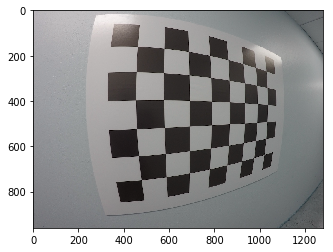

In [4]:
# Read first image and display it 
plt.imshow(images[0])

In [5]:
# Arrays to store object points and image points from all images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

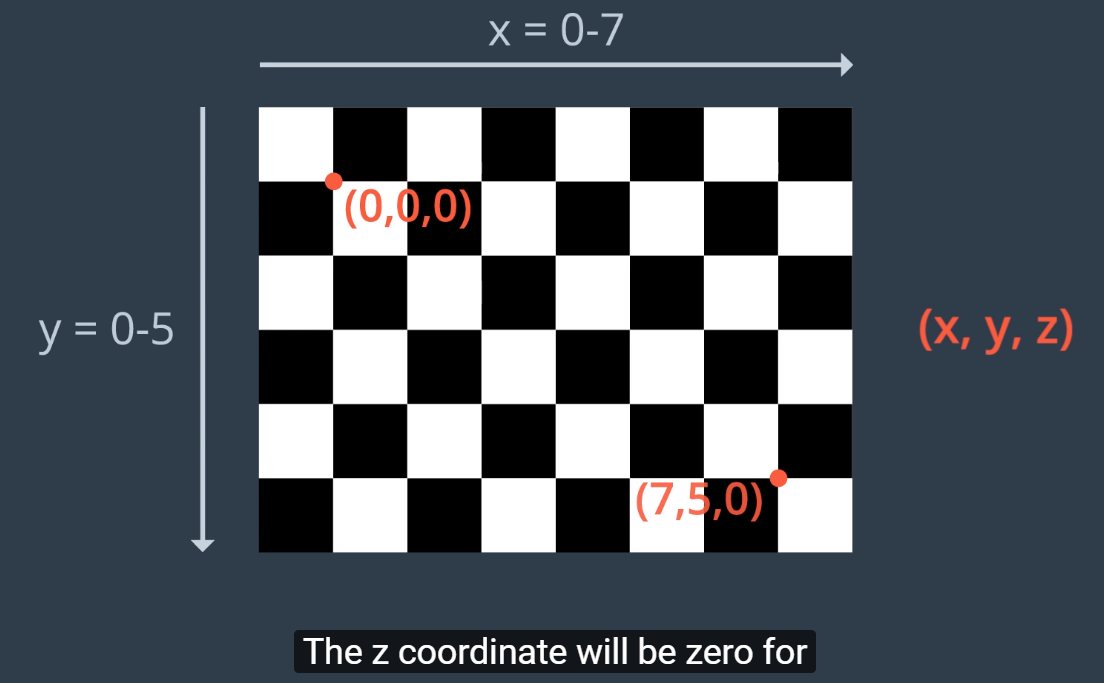

In [6]:
# Prepare object calibration points, like (0,0,0), (1,0,0), (2,0,0) ..., (7,5,0)
objp = np.zeros((6*8,3), np.float32)
print('Calibration points of zeros, Total points: ', objp.shape[0], ' Point Coordinates: ',  objp.shape[1])
# Use numpy mgrid function to generate point coordinates
DataPoints = np.mgrid[0:8, 0:6]

print ("Generate Data, Each point: ", DataPoints.shape[0], " rows: ", DataPoints.shape[1], " cols: ", DataPoints.shape[2])
# Transpose generated data
DataPoints = DataPoints.T
print ("Transposed Generated Data, row: ", DataPoints.shape[0], " col: ", DataPoints.shape[1], " xy: ", DataPoints.shape[2])
DataPoints = DataPoints.reshape(-1,2) # x, y cordinates
print ("Resized Generated Data, Total points: ", DataPoints.shape[0], " Point Coordinates: ", DataPoints.shape[1])

objp[:, :2] = DataPoints

Calibration points of zeros, Total points:  48  Point Coordinates:  3
Generate Data, Each point:  2  rows:  8  cols:  6
Transposed Generated Data, row:  6  col:  8  xy:  2
Resized Generated Data, Total points:  48  Point Coordinates:  2


NOTE: Since the origin corner is (0,0,0) the final corner is (6,4,0) relative to this corner rather than (7,5,0)

Next to create the image points I want to look atdistorted calibration image and detect the corners of the board

(38, 960, 1280)

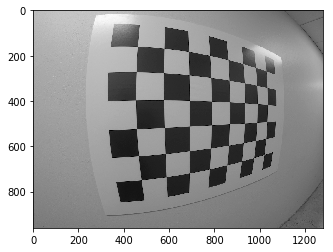

In [7]:
# convert images to gray
images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])
plt.imshow(images_gray[0], cmap="gray")
images_gray.shape

In [8]:
images_detect = []
# Find chessboard corners
for image in images_gray:
    ret, corners = cv2.findChessboardCorners(image, (8,6),None)
    # if corners are found
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # draw and display the corners
        img = cv2.drawChessboardCorners(image, (8,6), corners,ret)
        images_detect.append(img)

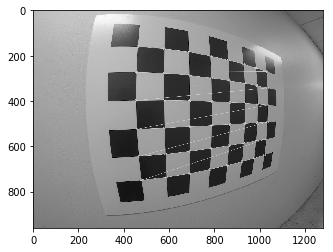

In [9]:
plt.imshow(images_detect[0], cmap='gray')

In [10]:
print("Image points: ", np.array(imgpoints).shape," Obj points: ", np.array(objpoints).shape)

Image points:  (35, 48, 1, 2)  Obj points:  (35, 48, 3)


### Calibrate camera function
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
cv2.calibrateCamera(). 

It returns:

(Convert 3D -> 2D)

- Success/Failure (ret)
- the camera matrix (mtx) 
- distortion coefficients (dist) 

(Position of camera in the world)

- rotation (rvecs)
- translation vectors (tvecs)

### UnDistort Function
dst = cv2.undistort(img, mtx, dist, None, mtx) 
- img: Distorted image
- mtx: Camera Matrix
- dist: Distortion Coefficients

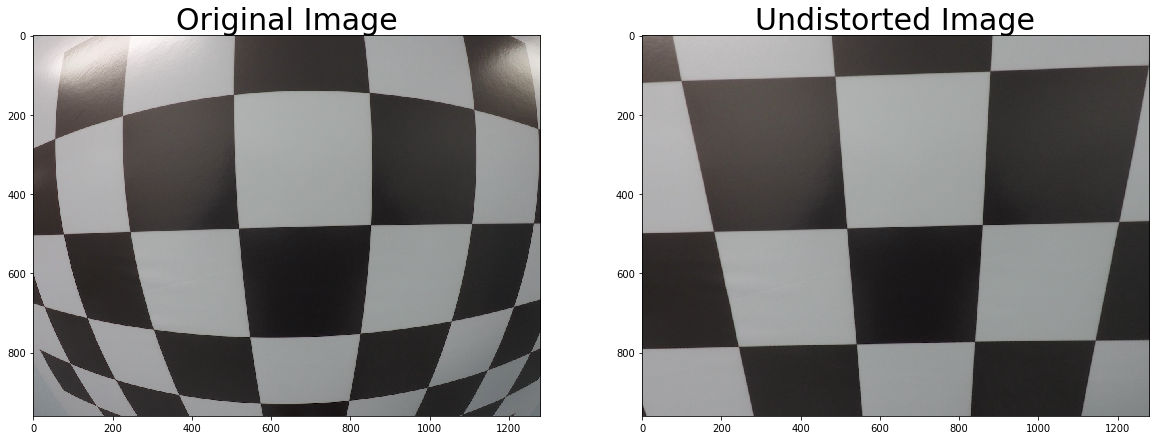

In [11]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)